# Generate modeled activation (MA) maps
If you're interested in performing clustering analyses across a database, you may want to generate the MA maps for all of the experiments in one large 2D/3D array.

In [1]:
from os.path import join

import numpy as np
import nibabel as nib

from pyale.tests.utils import get_test_data_path
from pyale.dataset import import_sleuth
from pyale.utils import get_resource_path, get_kernel

dataset = import_sleuth(join(get_test_data_path(), 'nat.txt'))

In [28]:
from pyale.meta import compute_ma

hed = nib.load(join(get_resource_path(), 'Grey10.nii'))
mask = hed.get_data().ravel()>0
shape = hed.shape + np.array([30, 30, 30])
ma_maps = [compute_ma(shape, exp.ijk, get_kernel(1, hed)[1]) for exp in dataset.experiments]
masked_ma_maps = [m[mask] for m in ma_maps]
masked_ma_maps = np.vstack(masked_ma_maps)
mat = np.corrcoef(masked_ma_maps)

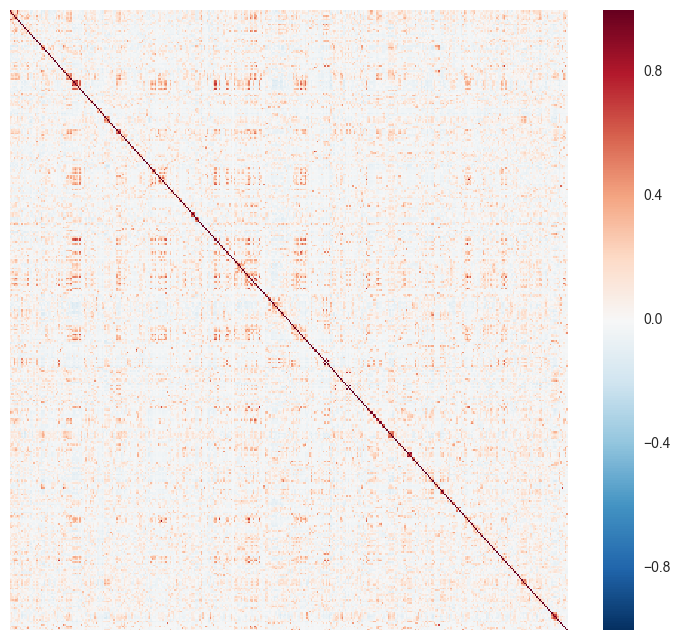

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(mat, ax=ax, xticklabels=False, yticklabels=False)
fig.show()